In [1]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import open3d as o3d
import sys
sys.path.append("..")
from data import utils
from data import load_raw_data

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


/work/ariyanzarei/SorghumSegmentation/TreePartNet/pointnet2_ops_lib/pointnet2_ops/pointnet2_utils.py:15: UserWarning: Unable to load pointnet2_ops cpp extension. JIT Compiling.
  warnings.warn("Unable to load pointnet2_ops cpp extension. JIT Compiling.")


In [36]:
path = "/space/ariyanzarei/sorghum_segmentation/dataset/synthetic/2022-09-29/h5_new/instance_segmentation_train.hdf5"
f = h5py.File(path,'r')
print(f.keys())
points_list = np.array(f['points'])
normals_list = np.array(f['normals'])
labels_list = np.array(f['labels'])
f.close()

<KeysViewHDF5 ['labels', 'normals', 'points']>


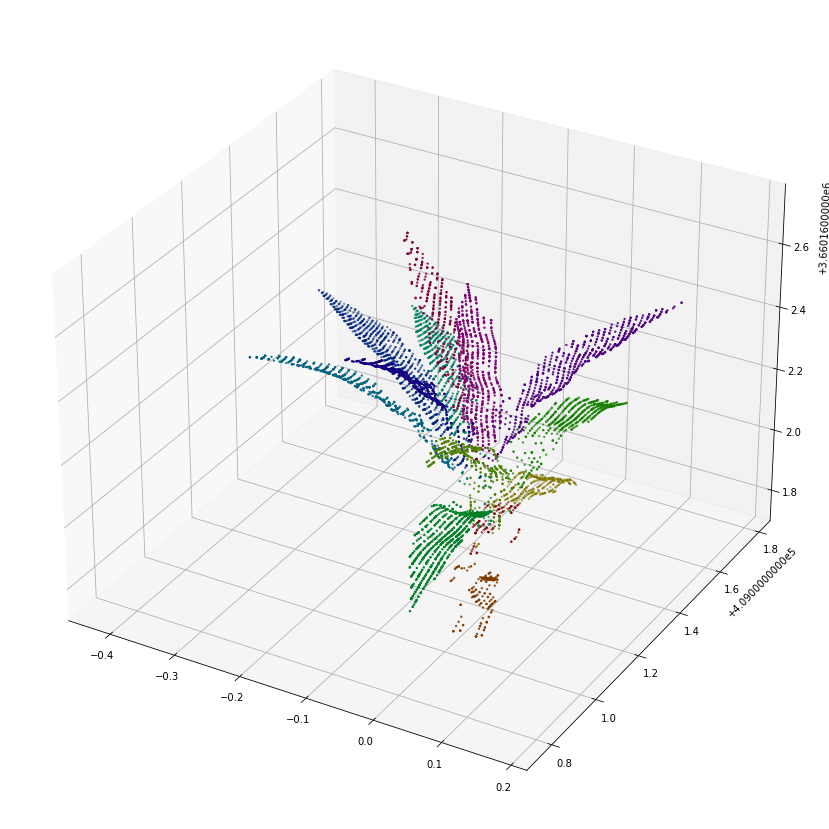

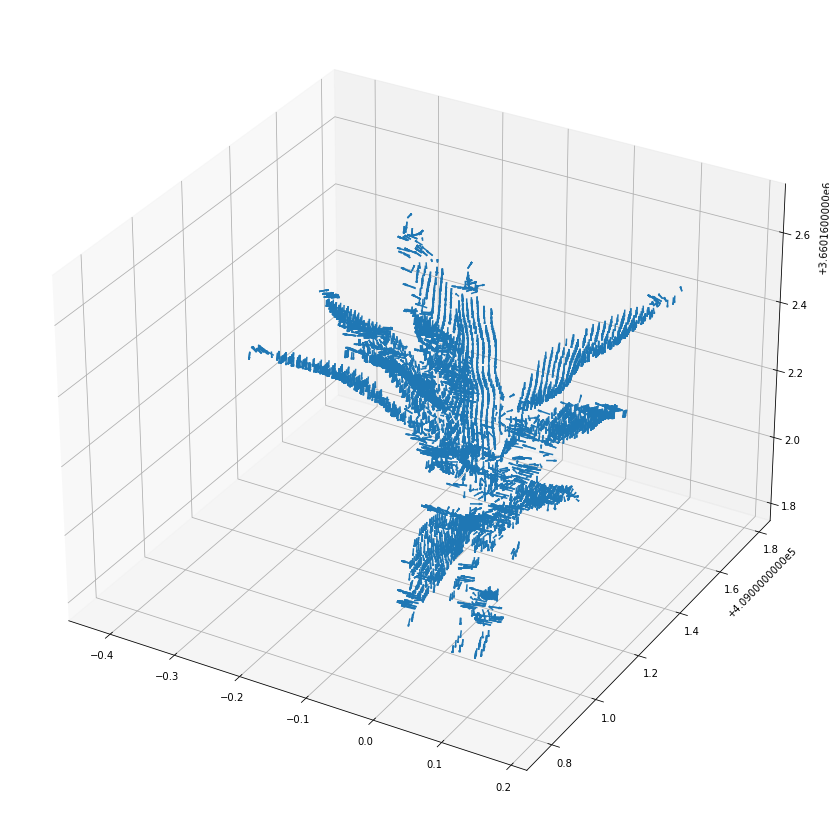

In [39]:
ind = 4
points = points_list[ind]
normals = normals_list[ind]
labels = labels_list[ind].squeeze()

d_colors = utils.distinct_colors(len(set(labels.tolist())))
colors = np.zeros((labels.shape[0], 3))
for i, l in enumerate(list(set(labels.tolist()))):
    colors[labels == l, :] = d_colors[i]

fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(projection='3d')
ax.scatter(points[:,2],points[:,0],points[:,1], s=2, c=colors)
plt.show()
fig = plt.figure(figsize=(15,15))
ax1 = fig.add_subplot(projection='3d')
ax1.quiver(points[:,2],points[:,0],points[:,1], normals[:,2],normals[:,0],normals[:,1],arrow_length_ratio=0.3,length=0.02)
plt.show()

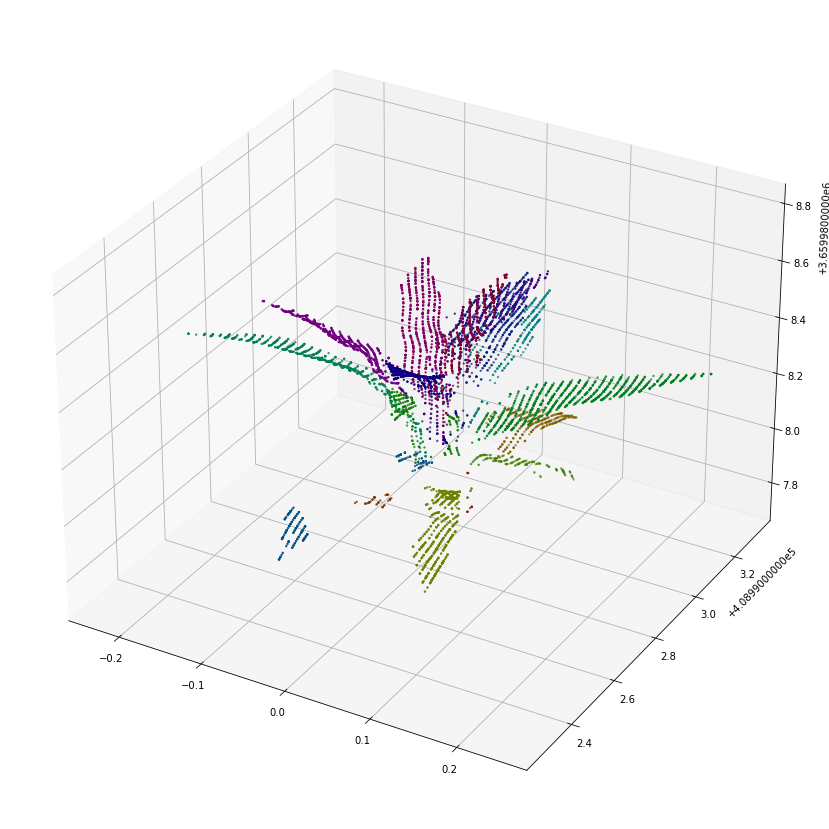

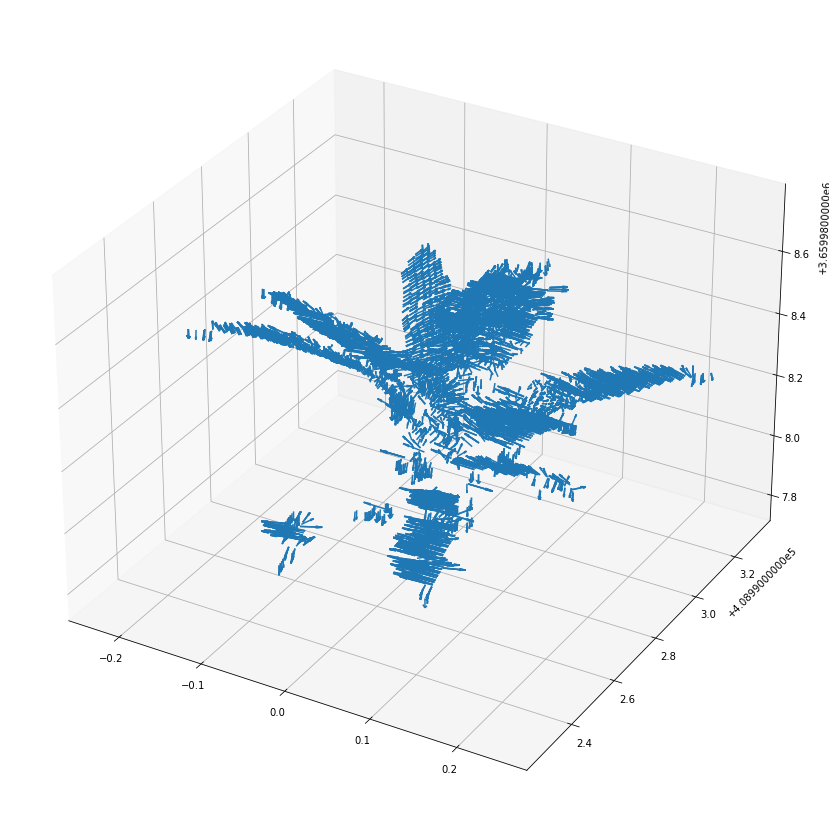

In [24]:
pcd = load_raw_data.load_pcd_plyfile_new_approach("/space/ariyanzarei/sorghum_segmentation/dataset/synthetic/2022-09-29/PointCloud/S11_34281.ply", True,std_coef=0.01)
points = pcd['points']
labels = pcd['labels'].squeeze()
normals = pcd['normals']

d_colors = utils.distinct_colors(len(set(labels.tolist())))
colors = np.zeros((labels.shape[0], 3))
for i, l in enumerate(list(set(labels.tolist()))):
    colors[labels == l, :] = d_colors[i]

fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(projection='3d')
ax.scatter(points[:,2],points[:,0],points[:,1], s=2, c=colors)
plt.show()
fig = plt.figure(figsize=(15,15))
ax1 = fig.add_subplot(projection='3d')
ax1.quiver(points[:,2],points[:,0],points[:,1], normals[:,2],normals[:,0],normals[:,1],arrow_length_ratio=0.3,length=0.03)
plt.show()

In [9]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import open3d as o3d
import sys
sys.path.append("..")
from data import utils
from data import load_raw_data
from models.datasets import SorghumDatasetWithNormals

ds = SorghumDatasetWithNormals("/space/ariyanzarei/sorghum_segmentation/dataset/synthetic/2022-11-06/h5/semantic_segmentation_train.hdf5",False,0.015)

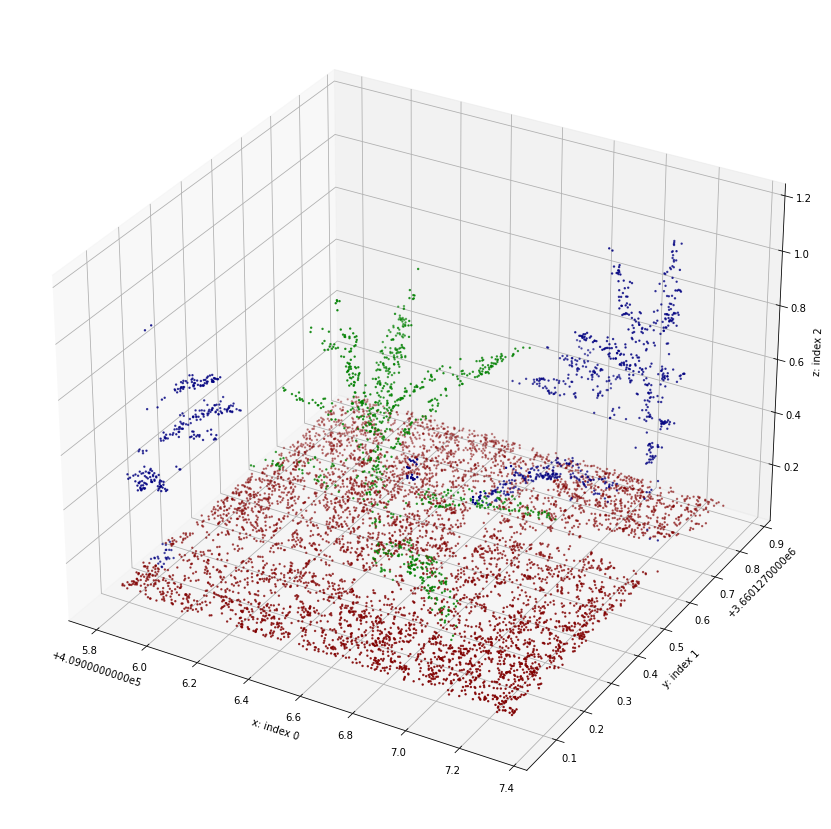

In [11]:

ind = 2
points, labels = ds[ind]
labels = labels.squeeze()

# points = points[labels==0]
# labels = labels[labels==0]

d_colors = utils.distinct_colors(len(set(labels.tolist())))
colors = np.zeros((labels.shape[0], 3))
for i, l in enumerate(list(set(labels.tolist()))):
    colors[labels == l, :] = d_colors[i]

fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(projection='3d')
ax.scatter(points[:,0],points[:,1],points[:,2], s=2, c=colors)
ax.set_xlabel("x: index 0")
ax.set_ylabel("y: index 1")
ax.set_zlabel("z: index 2")
plt.show()
# fig = plt.figure(figsize=(15,15))
# ax1 = fig.add_subplot(projection='3d')
# ax1.quiver(points[:,2],points[:,0],points[:,1], normals[:,2],normals[:,0],normals[:,1],arrow_length_ratio=0.3,length=0.02)
# plt.show()

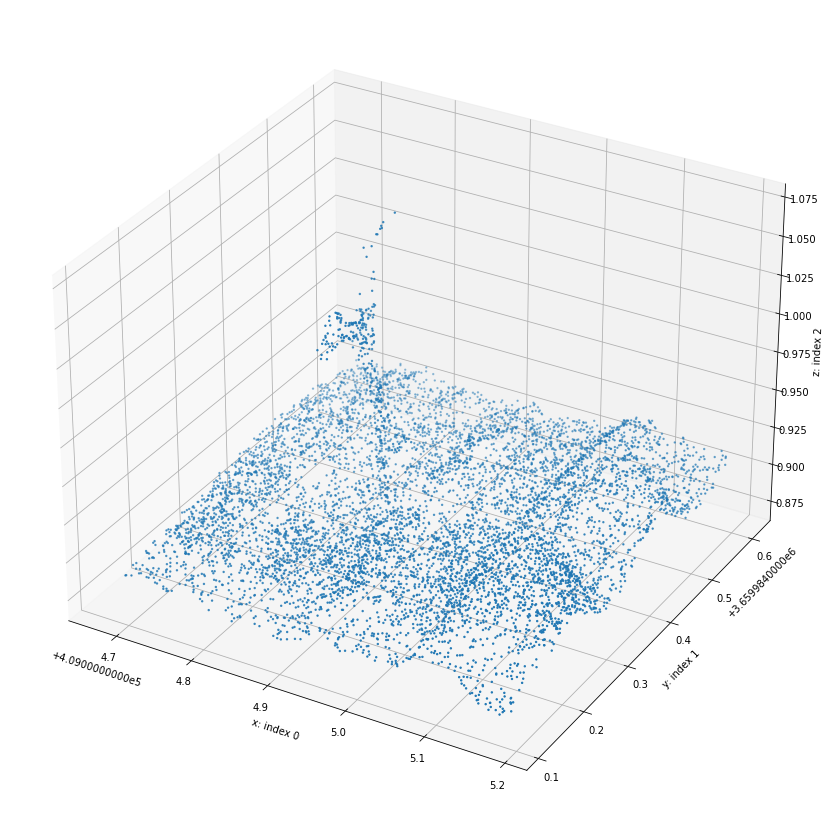

In [32]:
_,points,normals = load_raw_data.load_ply_file_points("/space/ariyanzarei/sorghum_segmentation/dataset/real_data/2020-07-13/PI_678362_421_330746381579.ply")


fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(projection='3d')
ax.scatter(points[:,0],points[:,1],points[:,2], s=2)
ax.set_xlabel("x: index 0")
ax.set_ylabel("y: index 1")
ax.set_zlabel("z: index 2")
plt.show()